## Семинар 2 - Нейросети

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install torch torchvision

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from tqdm import tqdm
import warnings
# warnings.simplefilter('ignore')
import torch
from torch.utils.data import DataLoader, Dataset, Subset
import torchvision
from torchvision import transforms
from matplotlib import pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import torch
print(torch.__version__)

1.10.0+cu111


# 1 PyTorch Dataset and DataLoader [this kernel](https://www.kaggle.com/pinocookie/pytorch-dataset-and-dataloader/data)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
!ls /content/gdrive/My\ Drive/Colab\ Notebooks/ML/семестр2/Семинар\ 02\ -\ NN/

In [ ]:
!unzip -q /content/gdrive/My\ Drive/Colab\ Notebooks/ML/семестр2/Семинар\ 02\ -\ NN/digits.zip -d ./gdrive/My\ Drive/Colab\ Notebooks/ML/семестр2/Семинар\ 02\ -\ NN/data

## 1 Custom Dataset

you have to overwrite **__len__()** and **__getitem__()** functions.

official code : 

```python
class Dataset(object):
    """An abstract class representing a Dataset.
    All other datasets should subclass it. All subclasses should override
    ``__len__``, that provides the size of the dataset, and ``__getitem__``,
    supporting integer indexing in range from 0 to len(self) exclusive.
    """

    def __init__(self, files):
        raise NotImplementedError

    def __getitem__(self, index):
        raise NotImplementedError

    def __len__(self):
        raise NotImplementedError

    def __add__(self, other):
        return ConcatDataset([self, other])
```

- **__init__()** : initial processes like reading a csv file, assigning transforms, ... 
- **__len__()** : return the size of input data
- **__getitem__()** : return data and label at orbitary index

In [ ]:
path = "./gdrive/My Drive/Colab Notebooks/ML/семестр2/Семинар 02 - NN/data/train.csv"
data = pd.read_csv(path)

In [ ]:
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
image = data.iloc[0, 1:].values.astype(np.uint8).reshape((28, 28))

In [ ]:
print(image.shape)

(28, 28)


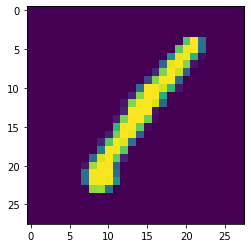

In [ ]:
plt.imshow(image)

In [ ]:
label = data.iloc[0, 0]
label

1

In [ ]:
len(data)

42000

let's create dataset for loading handwritten-digits data

In [ ]:
class DatasetMNIST(Dataset):
    
    def __init__(self, file_path, transform=None):
        
    def __len__(self):
    
    def __getitem__(self, index):
        # load image as ndarray type (Height * Width * Channels)
        # be carefull for converting dtype to np.uint8 [Unsigned integer (0 to 255)]
        # in this example, i don't use ToTensor() method of torchvision.transforms
        # so you can convert numpy ndarray shape to tensor in PyTorch (H, W, C) --> (C, H, W)
        
        if self.transform is not None:
            image = self.transform(image)
            
        return image, label

In [ ]:
train_dataset = DatasetMNIST(path, transform=None)

In [ ]:
train_dataset

## 2 transform is None

In [ ]:
# we can access and get data with index by __getitem__(index)
img, lab = train_dataset.__getitem__(0)

we now didn't convert numpy array.

In [ ]:
print(img.shape)
print(type(img))

(1, 28, 28)
<class 'numpy.ndarray'>


## 3 take a look at the dataset

you have to use data loader in PyTorch that will accutually read the data within batch size and put into memory.

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)

we can use dataloader as iterator by using iter() function.

In [ ]:
train_iter = iter(train_loader)
print(type(train_iter))

<class 'torch.utils.data.dataloader._SingleProcessDataLoaderIter'>


we can look at images and labels of batch size by extracting data .next() method.

In [ ]:
images, labels = train_iter.next()

print('images shape on batch size = {}'.format(images.size()))
print('labels shape on batch size = {}'.format(labels.size()))

images shape on batch size = torch.Size([8, 1, 28, 28])
labels shape on batch size = torch.Size([8])


/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


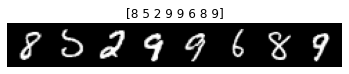

In [ ]:
# make grid takes tensor as arg
# tensor : (batchsize, channels, height, width)
grid = torchvision.utils.make_grid(images)

plt.imshow(grid.numpy().transpose((1, 2, 0)))
plt.axis('off')
plt.title(labels.numpy());

## 4 transform it ToTensor()**, add modes

In [ ]:
class DatasetMNIST2(Dataset):
    
    def __init__(self, file_path, transform=None):
        
    def __len__(self):
    
    def __getitem__(self, index):
        # load image as ndarray type (Height * Width * Channels)
        # be carefull for converting dtype to np.uint8 [Unsigned integer (0 to 255)]
        # in this example, we use ToTensor(), so we define the numpy array like (H, W, C)
        
        if self.transform is not None:
            image = self.transform(image)
            
        return image, label

In [ ]:
train_dataset2 = DatasetMNIST2(path, transform=torchvision.transforms.ToTensor())

In [ ]:
img, lab = train_dataset2.__getitem__(0)

print('image shape at the first row : {}'.format(img.size()))

image shape at the first row : torch.Size([1, 28, 28])


In [ ]:
train_loader2 = DataLoader(train_dataset2, batch_size=8, shuffle=True)

train_iter2 = iter(train_loader2)
print(type(train_iter2))

images, labels = train_iter2.next()

print('images shape on batch size = {}'.format(images.size()))
print('labels shape on batch size = {}'.format(labels.size()))

<class 'torch.utils.data.dataloader._SingleProcessDataLoaderIter'>
images shape on batch size = torch.Size([8, 1, 28, 28])
labels shape on batch size = torch.Size([8])


/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


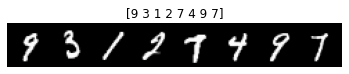

In [ ]:
grid = torchvision.utils.make_grid(images)

plt.imshow(grid.numpy().transpose((1, 2, 0)))
plt.axis('off')
plt.title(labels.numpy());

## 5 transform it [ToTensor(), some [augmentations](https://pytorch.org/docs/stable/torchvision/transforms.html)]

transforms.* methods use some type of input data like (tensor only), (tensor or numpy), (PILimage only), so you have to consider the order of transform

**ToTensor()**

```python
    """Convert a ``PIL Image`` or ``numpy.ndarray`` to tensor.
    Converts a PIL Image or numpy.ndarray (H x W x C) in the range
    [0, 255] to a torch.FloatTensor of shape (C x H x W) in the range [0.0, 1.0].
    (this is only for np.uint8 type)
    """
```

ToTensor() takes **PIL image** or **numpy ndarray** (both shapes are (Height, Width, Channels))

**ToPILImage**

```python
    """Convert a tensor or an ndarray to PIL Image.
    Converts a torch.*Tensor of shape C x H x W or a numpy ndarray of shape
    H x W x C to a PIL Image while preserving the value range.
    Args:
        mode (`PIL.Image mode`_): color space and pixel depth of input data (optional).
            If ``mode`` is ``None`` (default) there are some assumptions made about the input data:
            1. If the input has 3 channels, the ``mode`` is assumed to be ``RGB``.
            2. If the input has 4 channels, the ``mode`` is assumed to be ``RGBA``.
            3. If the input has 1 channel, the ``mode`` is determined by the data type (i,e,
            ``int``, ``float``, ``short``).
    .. _PIL.Image mode: https://pillow.readthedocs.io/en/latest/handbook/concepts.html#concept-modes
    """
```

ToPILImage() takes **torch.*Tensor ( C, H, W )** or **numpy ndarray ( H, W, C )**

**RandomHorizontalFlip**

```python
    """Horizontally flip the given PIL Image randomly with a given probability.
    Args:
        p (float): probability of the image being flipped. Default value is 0.5
    """
```

RandomHorizontalFlip() takes **PIL Image** only

if you want to take data augmentation, you have to make List using **torchvision.transforms.Compose**

this function can convert some image by order within **\__call__** method.

```python
class Compose(object):
    """Composes several transforms together.
    Args:
        transforms (list of ``Transform`` objects): list of transforms to compose.
    Example:
        >>> transforms.Compose([
        >>>     transforms.CenterCrop(10),
        >>>     transforms.ToTensor(),
        >>> ])
    """

    def __init__(self, transforms):
        self.transforms = transforms

    def __call__(self, img):
        for t in self.transforms:
            img = t(img)
        return img

    def __repr__(self):
        format_string = self.__class__.__name__ + '('
        for t in self.transforms:
            format_string += '\n'
            format_string += '    {0}'.format(t)
        format_string += '\n)'
        return format_string
```

In [ ]:
transform = 

In [ ]:
train_dataset3 = DatasetMNIST2(path, transform=transform)

In [ ]:
train_loader3 = DataLoader(train_dataset3, batch_size=8, shuffle=True)

train_iter3 = iter(train_loader3)
print(type(train_iter3))

images, labels = train_iter3.next()

print('images shape on batch size = {}'.format(images.size()))
print('labels shape on batch size = {}'.format(labels.size()))

<class 'torch.utils.data.dataloader._SingleProcessDataLoaderIter'>
images shape on batch size = torch.Size([8, 1, 28, 28])
labels shape on batch size = torch.Size([8])


/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


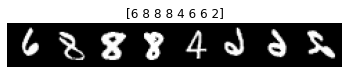

In [ ]:
grid = torchvision.utils.make_grid(images)

plt.imshow(grid.numpy().transpose((1, 2, 0)))
plt.axis('off')
plt.title(labels.numpy());

# Базовые штуки про нейросети

In [ ]:
28*28

784

In [ ]:
torch.flatten(images, start_dim=1).shape

torch.Size([8, 784])

## Создание

## [Batchnorm](https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm2d.html). [Dropout](https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html)

In [ ]:
def init_weights(m):
    if type(m) == torch.nn.Linear:
        torch.nn.init.xavier_uniform(m.weight)
        m.bias.data.fill_(0.01)

model.apply(init_weights)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  This is separate from the ipykernel package so we can avoid doing imports until


Model(
  (fl): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (bn1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): Sigmoid()
  (drp): Dropout(p=0.2, inplace=False)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
  (act2): Sigmoid()
  (fc3): Linear(in_features=10, out_features=10, bias=True)
)

## Обучение с DataLoader

In [ ]:
X = data.iloc[:, 1:]
Y = data.iloc[:, 0]

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(X, Y, train_size=0.7, random_state=1)
x_val, x_test, y_val, y_test = train_test_split(x_val, y_val, train_size=0.5, random_state=42)

In [ ]:
class DatasetMNIST(Dataset):


In [ ]:
img, lab = train_dataset.__getitem__(0)
print(img.shape)
print(type(img))

torch.Size([1, 28, 28])
<class 'torch.Tensor'>


In [ ]:
model = Model()
model.apply(init_weights);

In [ ]:
optim = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
criterion = torch.nn.CrossEntropyLoss()

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
model.train()
device

device(type='cuda')

In [ ]:
epochs = 4
loss_train_ep = []
loss_train_step = []
grads = []

for epoch in tqdm(range(epochs)):
  loss_epoch = 0
  for x, y in train_loader:
    optim.zero_grad()
    x = torch.tensor(x, device=device, dtype=torch.float32)
    y = torch.tensor(y, device=device)
    outputs = model(x)
    loss = criterion(outputs, y)
    
    loss.backward()
    optim.step()

    #
  


  loss_train_ep = np.append(loss_train_ep, loss_epoch)

print(loss_train_ep)

 25%|██▌       | 1/4 [00:15<00:45, 15.15s/it]

0.13317460317460317


 50%|█████     | 2/4 [00:30<00:30, 15.01s/it]

0.18825396825396826


 75%|███████▌  | 3/4 [00:45<00:15, 15.04s/it]

0.2219047619047619


100%|██████████| 4/4 [01:00<00:00, 15.02s/it]

0.2561904761904762
[274.96766949 263.61735964 258.08701086 254.07988429]


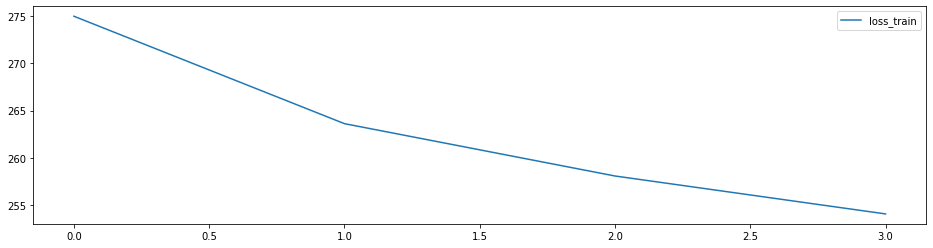

In [ ]:
fig = plt.figure(figsize=(16, 4))
plt.plot(loss_train_ep, label='loss_train_ep')

plt.legend()
plt.show()

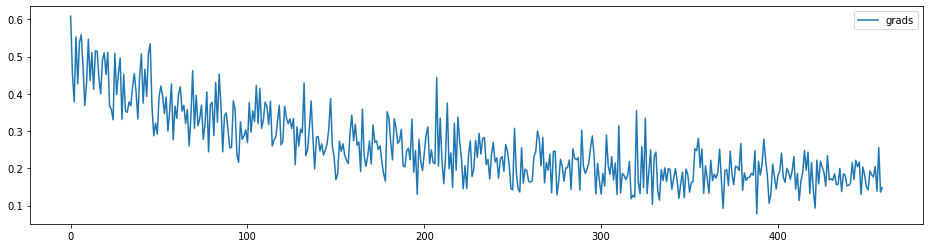

In [ ]:
fig = plt.figure(figsize=(16, 4))
plt.plot(grads, label='grads')

plt.legend()
plt.show()

## Лернинг рейт

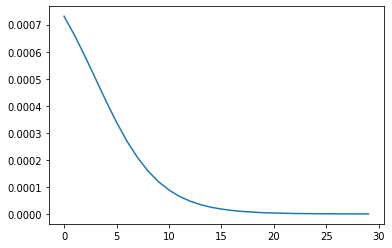

In [ ]:
lr = 0.001
lrs = []
epoches = 30
for i in range(epoches):
  lr = 0.001*(1/( 1 + np.exp(1/epoches * (i*10-epoches))))
  lrs.append(lr)

plt.plot(lrs)

In [ ]:
def cyclical_lr(stepsize, epochs, min_lr=3e-4, max_lr=3e-3):

    # Scaler: we can adapt this if we do not want the triangular CLR
    scaler = lambda x: 1.

    # Lambda function to calculate the LR
    lr_lambda = lambda it: min_lr + (max_lr - min_lr) * relative(it, stepsize)*2**(-it//(2*stepsize))

    # Additional function to see where on the cycle we are
    def relative(it, stepsize):
        cycle = np.floor(1 + it / (2 * stepsize))
        x = abs(it / stepsize - 2 * cycle + 1)
        return max(0, (1 - x)) * scaler(cycle)

    return lr_lambda

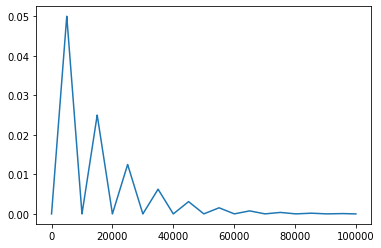

In [ ]:
epochs = 100000
step_size = epochs/20
clr = cyclical_lr(step_size, epochs, min_lr=1e-9, max_lr=1e-1)
lr = []
for id in range(epochs):
  # print(i)
  lr.append(clr(id))
plt.plot(lr[:])

 [Cosine annealing](https://paperswithcode.com/method/cosine-annealing#:~:text=Cosine%20Annealing%20is%20a%20type,before%20being%20increased%20rapidly%20again.)

## Использование предобученных моделей

In [ ]:
from torchvision import models

In [ ]:
model = models.resnet50(pretrained=True)

In [ ]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
def change_layers(model):
    model.conv1 = torch.nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    model.fc = torch.nn.Linear(2048, 10, bias=True)
    return model

change_layers(model)

ResNet(
  (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

## Отображение архитектуры

In [ ]:
!pip install torchinfo
from torchinfo import summary

batch_size = 256
summary(model, input_size=(batch_size, 1, 28, 28))

Layer (type:depth-idx)                   Output Shape              Param #
ResNet                                   --                        --
├─Conv2d: 1-1                            [256, 64, 14, 14]         3,136
├─BatchNorm2d: 1-2                       [256, 64, 14, 14]         128
├─ReLU: 1-3                              [256, 64, 14, 14]         --
├─MaxPool2d: 1-4                         [256, 64, 7, 7]           --
├─Sequential: 1-5                        [256, 256, 7, 7]          --
│    └─Bottleneck: 2-1                   [256, 256, 7, 7]          --
│    │    └─Conv2d: 3-1                  [256, 64, 7, 7]           4,096
│    │    └─BatchNorm2d: 3-2             [256, 64, 7, 7]           128
│    │    └─ReLU: 3-3                    [256, 64, 7, 7]           --
│    │    └─Conv2d: 3-4                  [256, 64, 7, 7]           36,864
│    │    └─BatchNorm2d: 3-5             [256, 64, 7, 7]           128
│    │    └─ReLU: 3-6                    [256, 64, 7, 7]           --
│ 

## Дообучение

In [ ]:
model = model.to(device)
model.train()

ResNet(
  (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
optim = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
criterion = torch.nn.CrossEntropyLoss()

In [ ]:
epochs = 4
loss_train_ep = []
loss_train_step = []
grads = []



print(loss_train_ep)

 25%|██▌       | 1/4 [00:46<02:18, 46.25s/it]

0.8119047619047619


 50%|█████     | 2/4 [01:31<01:31, 45.51s/it]

0.896984126984127


 75%|███████▌  | 3/4 [02:16<00:45, 45.42s/it]

0.9163492063492064


100%|██████████| 4/4 [03:01<00:00, 45.41s/it]

0.9265079365079365
[144.20977953  43.14844631  25.12019528  16.73403721]


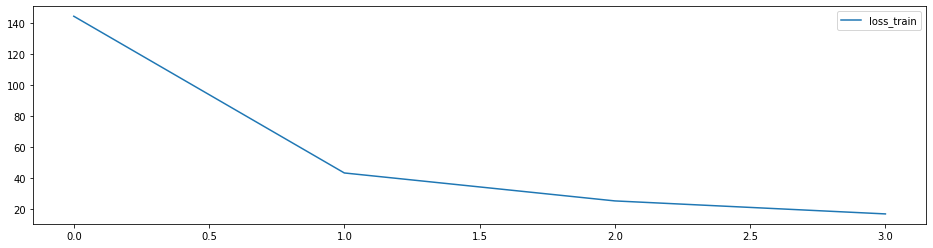

In [ ]:
fig = plt.figure(figsize=(16, 4))
plt.plot(loss_train_ep, label='loss_train_ep')

plt.legend()
plt.show()

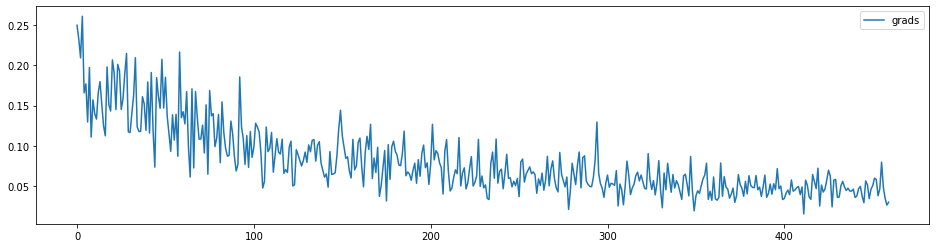

In [ ]:
fig = plt.figure(figsize=(16, 4))
plt.plot(grads, label='grads')

plt.legend()
plt.show()

## Сохранение и загрузка модели

#### Сохранение и... 

In [ ]:
torch.save(model.state_dict(), './gdrive/My Drive/Colab Notebooks/ML/семестр2/Семинар 02 - NN/model.pth')

#### ... загрузка

In [ ]:
loaded_model = models.resnet50(pretrained=False)
change_layers(loaded_model)
loaded_model.load_state_dict(torch.load('./gdrive/My Drive/Colab Notebooks/ML/семестр2/Семинар 02 - NN/model.pth'))

<All keys matched successfully>

In [ ]:
loaded_model.eval()

ResNet(
  (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
accuracy = 0
total = 0
for x, y in val_loader:
  with torch.no_grad():
    x = torch.tensor(x, device=device, dtype=torch.float32)
    y = torch.tensor(y, device=device)
    outputs = model(x)
    _, predicted = torch.max(outputs.data, 1)
    total += y.size(0)
    accuracy += (predicted == y).sum().item()
print(accuracy/total/len(val_loader))

0.9265079365079365
